# Dataset import

### installing

In [7]:

! pip install kaggle
!pip install tensorflow
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


### setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [4]:

! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d thedevastator/booking-com-hotel-reviews

Dataset URL: https://www.kaggle.com/datasets/thedevastator/booking-com-hotel-reviews
License(s): other
  0% 0.00/3.96M [00:00<?, ?B/s]
100% 3.96M/3.96M [00:00<00:00, 118MB/s]


In [6]:
! unzip booking-com-hotel-reviews.zip

Archive:  booking-com-hotel-reviews.zip
  inflating: booking_reviews copy.csv  


# explore dataset

### exploring

In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

In [9]:

db_reviews = pd.read_csv("booking_reviews copy.csv")
db_reviews.head()

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [10]:
db_reviews.shape


(26675, 16)

In [11]:
db_reviews.columns

Index(['index', 'review_title', 'reviewed_at', 'reviewed_by', 'images',
       'crawled_at', 'url', 'hotel_name', 'hotel_url', 'avg_rating',
       'nationality', 'rating', 'review_text', 'raw_review_text', 'tags',
       'meta'],
      dtype='object')

In [12]:
required_columns=['reviewed_by','hotel_name','hotel_url','review_title','review_text','rating','tags']
#filter the dataset to include only the required columns
df=db_reviews[required_columns]
df.head()



,reviewed_by,hotel_name,hotel_url,review_title,review_text,rating,tags
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,Exceptional,"Everything was perfect! Quite, cozy place to r...",10.0,Business trip~Solo traveller~Junior Suite~Stay...
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,I highly recommend this b&b! We enjoyed it a lot!,Very friendly host and perfect breakfast!,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,Exceptional,It was just what we wanted for a week by the b...,10.0,Leisure trip~Couple~Apartment with Sea View~St...
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,My stay in the house was a experiencing bliss ...,My stay in the house was a experiencing bliss ...,10.0,Business trip~Solo traveller~Junior Suite~Stay...
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,One bedroom apartment with wonderful view and ...,The building itself has a very musty smell in ...,9.2,Leisure trip~People with friends~Apartment wit...


In [13]:
df.shape

(26675, 7)

### cleaning step by step

In [11]:
df.groupby("review_text").count().sort_values("review_title", ascending=False)

,reviewed_by,hotel_name,hotel_url,review_title,rating,tags
review_text,,,,,,
There are no comments available for this review,7687,7687,7687,7687,7687,7687
Location,29,29,29,29,29,29
"Nothing,\n\nEverything",27,27,27,27,27,27
Everything,20,20,20,20,20,20
"Nothing ,\n\nEverything",12,12,12,12,12,12
...,...,...,...,...,...,...
"Little crowded when there was a wedding reception ,\n\nProfessional and friendly staff, very comfortable accommodation, great breakfast and excellent location. The bed is huge!",1,1,1,1,1,1
"Little choice of soft cocktails or with soft alcohol in it.,\n\nAwesome hotel, nice staff and a very good breakfast",1,1,1,1,1,1
"Little bit warm in the room (windows coud not be open),\n\nKind receptionists, perfect clean, big space in the room, big lockers, availibility of lockers after check-out, perfect bar and very good breakfast.",1,1,1,1,1,1


hotel_name      289
reviewed_by     105
hotel_url       289
rating          289
review_text     289
review_title      1
dtype: int64
Nombre total de lignes avec au moins une valeur NaN dans les colonnes essentielles: 290


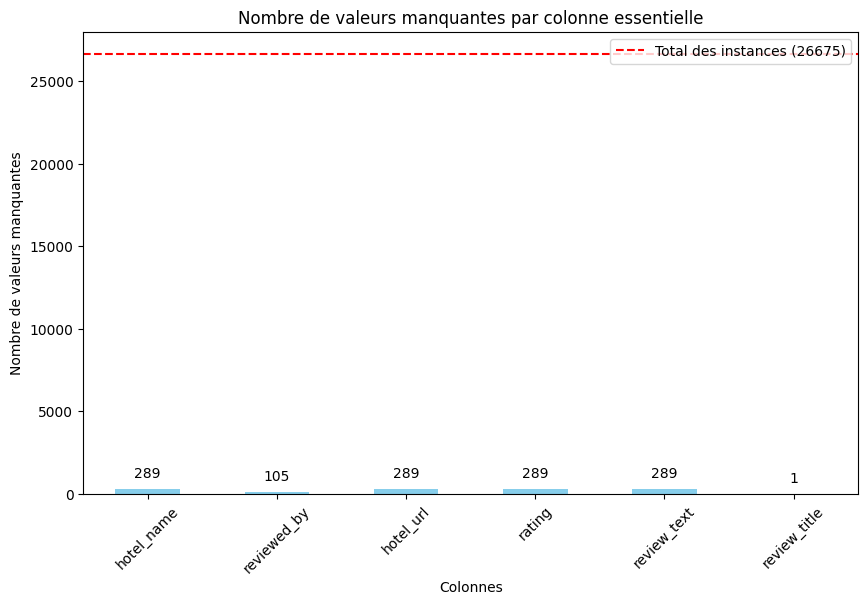

In [20]:
# Liste des colonnes essentielles
essential_columns = ['hotel_name', 'reviewed_by', 'hotel_url', 'rating', 'review_text','review_title']

# Calcul du nombre de lignes avec des valeurs NaN dans les colonnes essentielles
nan_counts = df[essential_columns].isna().sum()

# Affichage du nombre de valeurs NaN par colonne essentielle
print(nan_counts)

# Calcul du nombre total de lignes avec au moins une valeur NaN dans les colonnes essentielles
total_nan_rows = df[essential_columns].isna().any(axis=1).sum()

# Affichage du nombre total de lignes avec au moins une valeur NaN dans les colonnes essentielles
print(f"Nombre total de lignes avec au moins une valeur NaN dans les colonnes essentielles: {total_nan_rows}")

# Liste des colonnes essentielles


# Calcul du nombre de lignes avec des valeurs NaN dans les colonnes essentielles
nan_counts = df[essential_columns].isna().sum()

# Calcul du nombre total de lignes
total_rows = len(df)

# Création du graphique
plt.figure(figsize=(10, 6))
bars = nan_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes par colonne essentielle')
plt.axhline(y=total_rows, color='r', linestyle='--', label=f'Total des instances ({total_rows})')
plt.xticks(rotation=45)

# Ajouter la légende en haut à droite
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Ajouter le nombre de valeurs manquantes au-dessus de chaque barre
for i, count in enumerate(nan_counts):
    plt.text(i, count + 0.02 * total_rows, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
df.review_text = df.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")
df.groupby("review_text").count().sort_values("review_title", ascending=False).head(10)

<ipython-input-16-6b3b69381a94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review_text = df.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")


,reviewed_by,hotel_name,hotel_url,review_title,rating,tags
review_text,,,,,,
,7687,7687,7687,7687,7687,7687
Location,29,29,29,29,29,29
"Nothing,\n\nEverything",27,27,27,27,27,27
Everything,20,20,20,20,20,20
"Nothing ,\n\nEverything",12,12,12,12,12,12
Great location,10,10,10,10,10,10
Breakfast,6,6,6,6,6,5
Excellent,6,6,6,6,6,6
"nothing,\n\neverything",6,6,6,6,6,6


In [ ]:
df['final_review'] = df.review_title +". " + df.review_text
df.drop(columns=['review_title', 'review_text'], inplace=True)
df

<ipython-input-17-c694ae38236d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_review'] = df.review_title +". " + df.review_text
<ipython-input-17-c694ae38236d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['review_title', 'review_text'], inplace=True)


,reviewed_by,hotel_name,hotel_url,rating,tags,final_review
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"Exceptional. Everything was perfect! Quite, co..."
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,I highly recommend this b&b! We enjoyed it a l...
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,Exceptional. It was just what we wanted for a ...
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,My stay in the house was a experiencing bliss ...
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,One bedroom apartment with wonderful view and ...
...,...,...,...,...,...,...
26670,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,8.8,Business trip~Solo traveller~Double or Twin Ro...,Good stay. Had a room with the view to the mai...
26671,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,10.0,Leisure trip~Family with young children~Tent~S...,"Exceptional. There was nothing not to like. ,\..."
26672,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.9,Leisure trip~Couple~Standard Double or Twin Ro...,Good. Poor internet connection and aircon in r...
26673,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,8.3,Leisure trip~Couple~Basic Double Room~Stayed 1...,Very good.


In [ ]:
# Assurez-vous que toutes les valeurs sont des chaînes de caractères et remplacez les valeurs manquantes par une chaîne vide
df['final_review'] = df['final_review'].astype(str).fillna('')

# Convertir en minuscules
df['final_review'] = df['final_review'].map(lambda x: x.lower())

# Supprimer les espaces en début et fin
df['final_review'] = df['final_review'].map(lambda x: x.strip())

# Supprimer les espaces supplémentaires
df['final_review'] = df['final_review'].map(lambda x: " ".join(x.split()))

# Supprimer les morceaux de texte non informatifs
df['final_review'] = df['final_review'].map(lambda x: re.sub(r'\@\w+|\#','', x))

# Supprimer les caractères non alphabétiques
# df3['final_review'] = df3['final_review'].map(lambda x: re.sub(r'[^A-Za-z\s]','', x))

# Supprimer les mots (everything, nothing) => ca n'aide pas
df['final_review'] = df.final_review.apply(lambda x: x.replace("everything", ""))
df['final_review'] = df.final_review.apply(lambda x: x.replace("nothing", ""))


df.head()

<ipython-input-18-f17c5a73a305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_review'] = df['final_review'].astype(str).fillna('')
<ipython-input-18-f17c5a73a305>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_review'] = df['final_review'].map(lambda x: x.lower())
<ipython-input-18-f17c5a73a305>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,reviewed_by,hotel_name,hotel_url,rating,tags,final_review
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t..."
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...


In [ ]:
df = df.dropna(subset=['hotel_name', 'reviewed_by','hotel_url','rating','final_review'])


### cleaning function

In [14]:
def clean_dataset(df):
  required_columns=['reviewed_by','hotel_name','hotel_url','review_title','review_text','rating','tags']
  #filter the dataset to include only the required columns
  df=db_reviews[required_columns]
  #replace "There are no comments available for this review" with " "
  df['review_text']= df.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")
  #Because there are a lot of reviews with title, but without review text, we will combine two variables into one.
  df['final_review'] = df.review_title +". " + df.review_text
  df.drop(columns=['review_title', 'review_text'], inplace=True)
  # Assurez-vous que toutes les valeurs sont des chaînes de caractères et remplacez les valeurs manquantes par une chaîne vide
  df['final_review'] = df['final_review'].astype(str).fillna('')

  # Convertir en minuscules
  df['final_review'] = df['final_review'].map(lambda x: x.lower())

  # Supprimer les espaces en début et fin
  df['final_review'] = df['final_review'].map(lambda x: x.strip())

  # Supprimer les espaces supplémentaires
  df['final_review'] = df['final_review'].map(lambda x: " ".join(x.split()))

  # Supprimer les morceaux de texte non informatifs
  df['final_review'] = df['final_review'].map(lambda x: re.sub(r'\@\w+|\#','', x))

  # Supprimer les caractères non alphabétiques
  # df['final_review'] = df['final_review'].map(lambda x: re.sub(r'[^A-Za-z\s]','', x))

  # Supprimer les mots (everything, nothing) => ca n'aide pas
  df['final_review'] = df.final_review.apply(lambda x: x.replace("everything", ""))
  df['final_review'] = df.final_review.apply(lambda x: x.replace("nothing", ""))

  # Supprimer les champs null
  df=df.dropna(subset=['hotel_name', 'reviewed_by','hotel_url','rating','final_review'])

  return df



In [15]:
df=clean_dataset(df)
df.shape

<ipython-input-14-d445d6815196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text']= df.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")
<ipython-input-14-d445d6815196>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_review'] = df.review_title +". " + df.review_text
<ipython-input-14-d445d6815196>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

(26386, 6)

# Modelling with vader

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

df['sentiment_score'] = df['final_review'].apply(sentiment_analyzer_scores)
df.head()

,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,sentiment_score
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",0.8004
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,0.9344
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,0.7152
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,0.9816
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,0.9835


In [18]:
df['Sentiment'] = np.where(df['sentiment_score'] > 0.25, 'Positive', 'Negative')
df.head(10)

,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,sentiment_score,Sentiment
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",0.8004,Positive
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,0.9344,Positive
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,0.7152,Positive
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,0.9816,Positive
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,0.9835,Positive
5,Nicola,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Couple~Junior Suite~Stayed 1 nig...,fantastic! beautiful home with a gracious welc...,0.9908,Positive
6,Macıej,Love Nest Versailles - Unique Louis XIV decora...,https://www.booking.com/hotel/be/love-nest-ver...,10.0,Business trip~Couple~Deluxe Double Room with B...,"perfect, great bath in the room!. to many mes...",0.9927,Positive
7,Hpvdh,Gite Namaste,https://www.booking.com/hotel/be/gite-namaste....,8.3,Leisure trip~Family with young children~Four-B...,"very good. spacious, more than enough rooms, a...",0.7574,Positive
8,Zoe,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~Couple~Apartment with Sea View~St...,superb.,0.6249,Positive
9,Richard,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Group~Deluxe Suite~Stayed 1 night,"highly recommended. -- place was perfect, thi...",0.9701,Positive


Sentiment
Positive    21081
Negative     5305
Name: count, dtype: int64

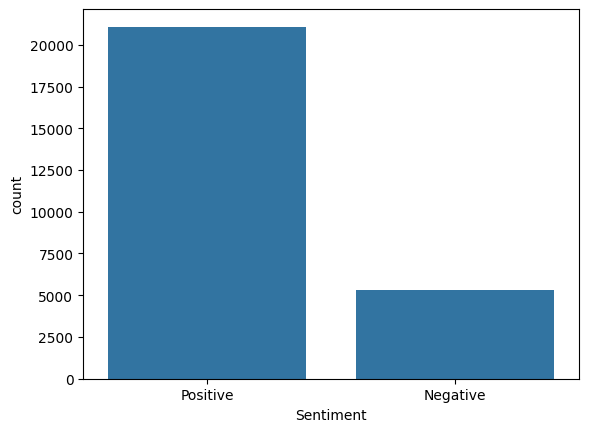

In [19]:
import seaborn as sns #  countplot de la librairie seaborn pour voir si le dataset est équilibré ou non

sns.countplot(x='Sentiment', data=df)
df.Sentiment.value_counts()

In [20]:

df['Label'] = np.where(df['rating'] > 5, 'Positive', 'Negative')
df.Label.value_counts()


Label
Positive    25168
Negative     1218
Name: count, dtype: int64

In [21]:
confusion_matrix=confusion_matrix(df['Label'],df['Sentiment'])

In [22]:
print(classification_report(df['Label'],df['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.18      0.79      0.30      1218
    Positive       0.99      0.83      0.90     25168

    accuracy                           0.83     26386
   macro avg       0.59      0.81      0.60     26386
weighted avg       0.95      0.83      0.87     26386



Text(0.5, 1.0, 'Confusion matrix')

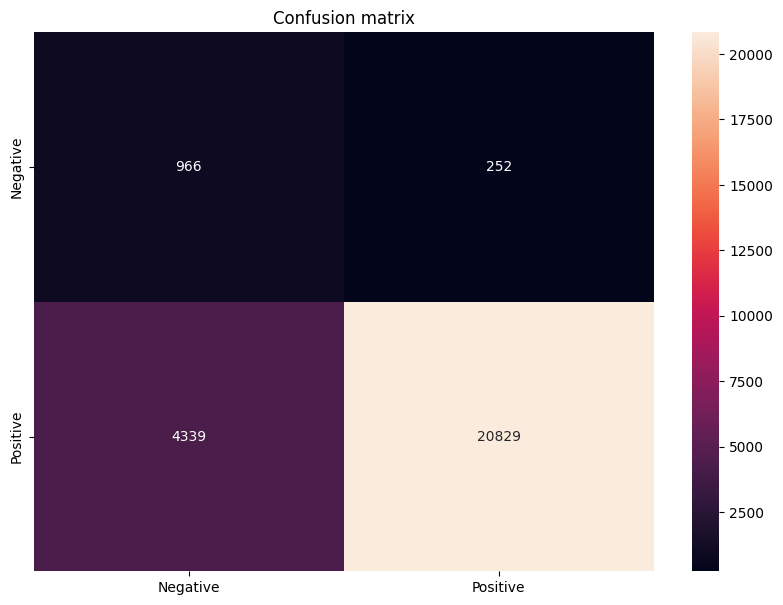

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title('Confusion matrix')


# Deep Learning Approach: LSTM

### initialize

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Bidirectional,Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import re

In [ ]:
df2=clean_dataset(db_reviews)

<ipython-input-13-d445d6815196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text']= df.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")
<ipython-input-13-d445d6815196>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_review'] = df.review_title +". " + df.review_text
<ipython-input-13-d445d6815196>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [ ]:
    #converting score to label sentiment for calucating evalutation metrics
df2['Label_Sentiment'] = np.where(df2['rating'] > 5, 1, 0)


print(df2.Label_Sentiment.value_counts())

print(df2.shape)
df2.head()



Label_Sentiment
1    25168
0     1218
Name: count, dtype: int64
(26386, 7)


,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",1
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,1
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,1
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,1
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,1


Label_Sentiment
1    25168
0     1218
Name: count, dtype: int64

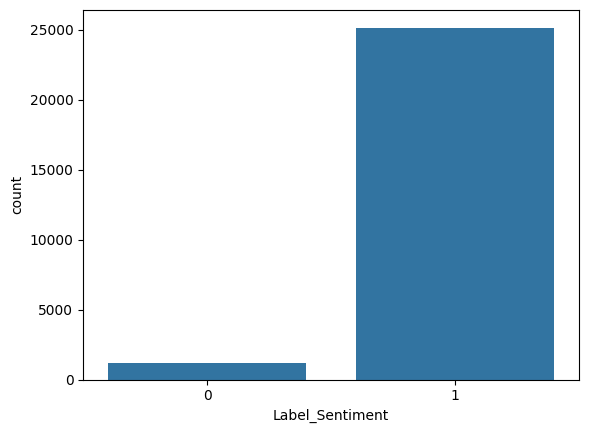

In [ ]:
import seaborn as sns #  countplot de la librairie seaborn pour voir si le dataset est équilibré ou non

sns.countplot(x='Label_Sentiment', data=df2)
df2.Label_Sentiment.value_counts()

In [ ]:
 # equilibrage : take equal number of positive, negative and neutral reviews for training the model
dfpos=df2[df2['Label_Sentiment']==1].sample(n=1218,random_state=42).reset_index(drop=True)
dfneg=df2[df2['Label_Sentiment']==0].sample(n=1218,random_state=42).reset_index(drop=True)
df3=pd.concat([dfpos,dfneg],axis=0).reset_index(drop=True)



X= df3['final_review']
y =df3['Label_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)



In [ ]:
def get_max_length():
    text_length = []
    for text in X_train:
        text_length.append(len(text))
    return int(np.ceil(np.mean(text_length)))

max_length = get_max_length()
max_length

213

In [ ]:
def embeddings(path):
    embeddings_dictionary = dict()
    embeddings_file = open(path)
    for line in embeddings_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:],dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
    embeddings_file.close()
    return embeddings_dictionary

In [ ]:
def model_test_acc(model, X_test, y_test):
    score = model.evaluate(X_test, y_test, verbose=1)
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])
    return score[1]


### equilabrage dataset +bilstm + glove

In [ ]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1
maxlen = max_length
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


print('Maximum text length',max_length)
print('vocab size',vocab_size)

Maximum text length 213
vocab size 5759


In [ ]:
#glove

embeddings_dictionary=embeddings("/content/drive/MyDrive/tp4_rnn/glove.6B.100d.txt")
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
def train_lstm_model(embedding_matrix):
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(64)))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    print(model.summary())
    return model

In [ ]:

model = train_lstm_model(embedding_matrix)
histLSTM_GLOVE = model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_split=0.2)

lstm_acc=model_test_acc(model, X_test, y_test)
lstm_acc

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 213, 100)          575900    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 660509 (2.52 MB)
Trainable params: 84609 (330.50 KB)
Non-trainable params: 575900 (2.20 MB)
_________________________________________________________________
None
Epoch 1/5
25/25 [==============================] - 16s 407ms/step - loss: 0.5693 - acc: 0.7696 - val_loss: 0.4461 - val_acc: 0.8256
Epoch 2/5
25/25 [==============================] - 14s 574ms/step - loss: 0.3

0.9344262480735779

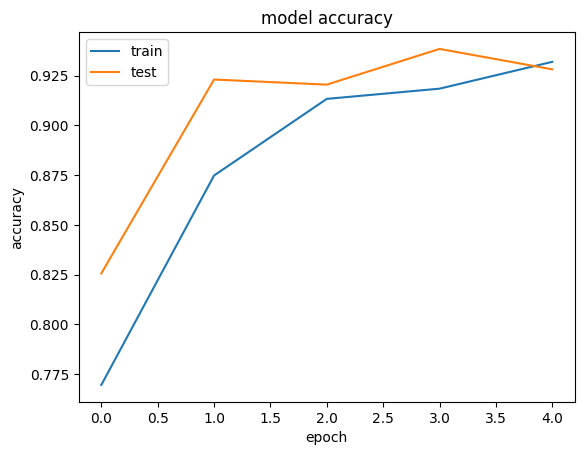

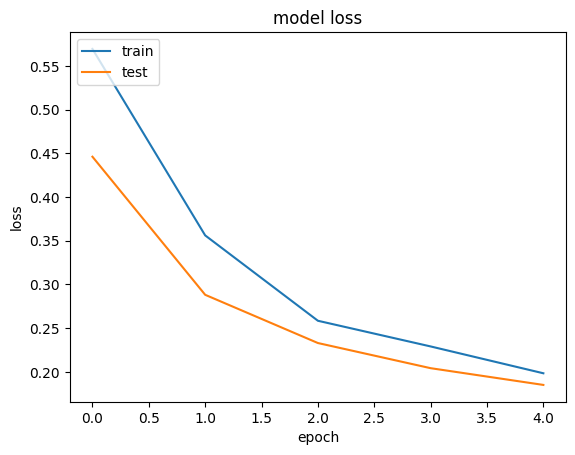

In [ ]:

plt.plot(histLSTM_GLOVE.history['acc'])
plt.plot(histLSTM_GLOVE.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(histLSTM_GLOVE.history['loss'])
plt.plot(histLSTM_GLOVE.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### lstm

In [ ]:
dfpos=df2[df2['Label_Sentiment']==1].sample(n=1218,random_state=42).reset_index(drop=True)
dfneg=df2[df2['Label_Sentiment']==0].sample(n=1218,random_state=42).reset_index(drop=True)
df3=pd.concat([dfpos,dfneg],axis=0).reset_index(drop=True)

print(df3)

X= df3['final_review']
y =df3['Label_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1
maxlen = max_length
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

     reviewed_by                           hotel_name  \
0        Eugenie                       Hotel Ambrosia   
1           Lina                        B&B La Gotale   
2     Bernadette                            Parkhotel   
3           Ieva                      C-Hotels Cocoon   
4              D                l'Ardenne buissonière   
...          ...                                  ...   
2431     Mustafa                        Hotel Albergo   
2432     Michael  Van der Valk Hotel Brussels Airport   
2433       Duško                        Tourist Hotel   
2434   Anonymous                       Hotel Van Eyck   
2435       David                Hotel Class'Eco Namur   

                                              hotel_url  rating  \
0     https://www.booking.com/hotel/be/ambrosia.en-g...    10.0   
1     https://www.booking.com/hotel/be/la-gotale-mai...    10.0   
2     https://www.booking.com/hotel/be/parkhotel-gen...     9.6   
3     https://www.booking.com/hotel/be/c-hotels

In [ ]:
#Embedding layer
#LSTM Layer
#Forget gate, input gate, cell state, output state
#dense state
#optimiser adam
#loss function binary crossentropy
import tensorflow as tf

EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(vocab_size, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 166, 32)           184288    
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 209185 (817.13 KB)
Trainable params: 209185 (817.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
13/13 [==============================] - 7s 328ms/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6925 - val_accuracy: 0.5154
Epoch 2/6
13/13 [==============================] - 2s 155ms/step - loss: 0.6923 - accuracy: 0.5154 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/6
13/13 [==============================] - 3s 219ms/step - loss: 0.6896 - accuracy: 0.5257 - val_loss: 0.6880 - val_accuracy: 0.5051
Epoch 4/6
13/13 [==============================] - 3s 191ms/step - loss: 0.6809 - accuracy: 0.5494 - val_loss: 0.6871 - val_accuracy: 0.5128
Epoch 5/6
13/13 [==============================] - 2s 167ms/step - loss: 0.6702 - accuracy: 0.5745 - val_loss: 0.6820 - val_accuracy: 0.5410
Epoch 6/6
13/13 [==============================] - 2s 206ms/step - loss: 0.6712 - accuracy: 0.5488 - val_loss: 0.6856 - val_accuracy: 0.5128


In [ ]:
model_test_acc(model, test_padded , y_test)

16/16 [==============================] - 0s 10ms/step - loss: 0.6769 - accuracy: 0.5676
Test Score: 0.6769279837608337
Test Accuracy: 0.5676229596138


0.5676229596138

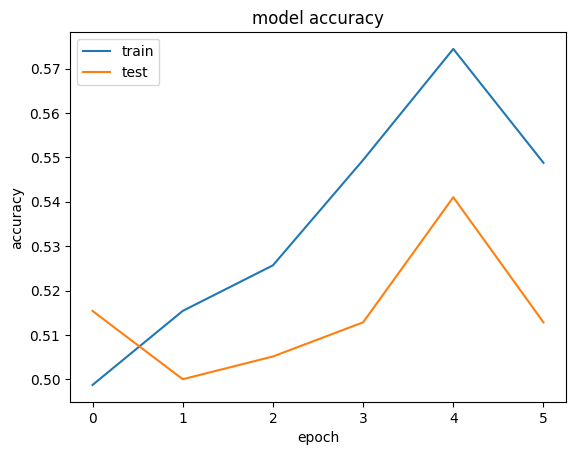

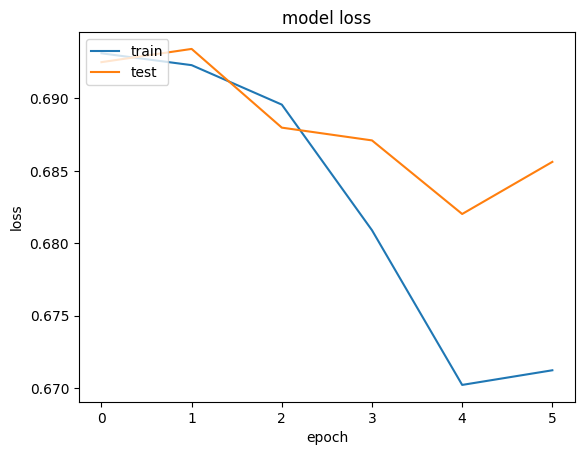

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### lstm+ word2vec

In [ ]:
def train_lstm_model2(embedding_matrix,size_emb_vector):
    model = Sequential()
    embedding_layer = Embedding(vocab_size, size_emb_vector, weights=[embedding_matrix], input_length=maxlen, trainable=False)
    model.add(embedding_layer)
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
#wor2vec

dfpos=df2[df2['Label_Sentiment']==1].sample(n=1218,random_state=42).reset_index(drop=True)
dfneg=df2[df2['Label_Sentiment']==0].sample(n=1218,random_state=42).reset_index(drop=True)
df3=pd.concat([dfpos,dfneg],axis=0).reset_index(drop=True)

print(df3)

X= df3['final_review']
y =df3['Label_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1
maxlen = max_length
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



word2vecdict=embeddings("/content/drive/MyDrive/tp4_rnn/GoogleNews-vectors-negative300(first500000).txt")


embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = word2vecdict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

     reviewed_by                           hotel_name  \
0        Eugenie                       Hotel Ambrosia   
1           Lina                        B&B La Gotale   
2     Bernadette                            Parkhotel   
3           Ieva                      C-Hotels Cocoon   
4              D                l'Ardenne buissonière   
...          ...                                  ...   
2431     Mustafa                        Hotel Albergo   
2432     Michael  Van der Valk Hotel Brussels Airport   
2433       Duško                        Tourist Hotel   
2434   Anonymous                       Hotel Van Eyck   
2435       David                Hotel Class'Eco Namur   

                                              hotel_url  rating  \
0     https://www.booking.com/hotel/be/ambrosia.en-g...    10.0   
1     https://www.booking.com/hotel/be/la-gotale-mai...    10.0   
2     https://www.booking.com/hotel/be/parkhotel-gen...     9.6   
3     https://www.booking.com/hotel/be/c-hotels

In [ ]:
#lstm

model = train_lstm_model2(embedding_matrix,300)
histLSTM_W2V = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

lstm_acc_w2v=model_test_acc(model, X_test, y_test)
lstm_acc_w2v

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 166, 300)          1727700   
                                                                 
 lstm_4 (LSTM)               (None, 128)               219648    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1947477 (7.43 MB)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 1727700 (6.59 MB)
_________________________________________________________________
None
Epoch 1/6
13/13 [==============================] - 4s 84ms/step - loss: 0.6788 - accuracy: 0.5257 - val_loss: 0.6815 - val_accuracy: 0.5128
Epoch 2/6
13/13 [==============================] - 0s 25ms/step - loss: 0.6703 - accuracy: 0.5488 - val_loss: 0.6791 - val_accurac

0.5778688788414001

### predict


In [ ]:

sentence=["it smelt like raw sewerage and was so disappointing ", "passable","the hotel is exceptional","disappointing"," bathroom floor dirty","i love it","the bed wasn't clean and not comfortable","the rooms are fantastic, i will return  to it soon"]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 138ms/step
it smelt like raw sewerage and was so disappointing 
Predicted sentiment :  Negative
passable
Predicted sentiment :  Negative
the hotel is exceptional
Predicted sentiment :  Positive
disappointing
Predicted sentiment :  Negative
 bathroom floor dirty
Predicted sentiment :  Negative
i love it
Predicted sentiment :  Positive
the bed wasn't clean and not comfortable
Predicted sentiment :  Negative
the rooms are fantastic, i will return  to it soon
Predicted sentiment :  Positive


### equilabrage dataset +bilstm + prediction + confusion matrix (le meilleur)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Hyperparameters of the model
vocab_size = vocab_size # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = max_length # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)



In [ ]:
# model initialization
model2 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(24, activation='relu'),

    Dense(1, activation='sigmoid')
])
# compile model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
# model summary
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 213, 100)          500000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               84480     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 24)                3096      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 587601 (2.24 MB)
Trainable params: 587601 (2.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 5
history2 = model2.fit(train_padded, y_train,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.2)

Epoch 1/5
49/49 [==============================] - 27s 404ms/step - loss: 0.6230 - acc: 0.6804 - val_loss: 0.4812 - val_acc: 0.8077
Epoch 2/5
49/49 [==============================] - 16s 327ms/step - loss: 0.2352 - acc: 0.9249 - val_loss: 0.2047 - val_acc: 0.9282
Epoch 3/5
49/49 [==============================] - 24s 484ms/step - loss: 0.0864 - acc: 0.9756 - val_loss: 0.2078 - val_acc: 0.9282
Epoch 4/5
49/49 [==============================] - 28s 572ms/step - loss: 0.0561 - acc: 0.9859 - val_loss: 0.2271 - val_acc: 0.9308
Epoch 5/5
49/49 [==============================] - 16s 332ms/step - loss: 0.0339 - acc: 0.9917 - val_loss: 0.2782 - val_acc: 0.9256


In [ ]:
model_test_acc(model2, test_padded , y_test)

16/16 [==============================] - 1s 66ms/step - loss: 0.2607 - acc: 0.9324
Test Score: 0.26065880060195923
Test Accuracy: 0.9323770403862


0.9323770403862

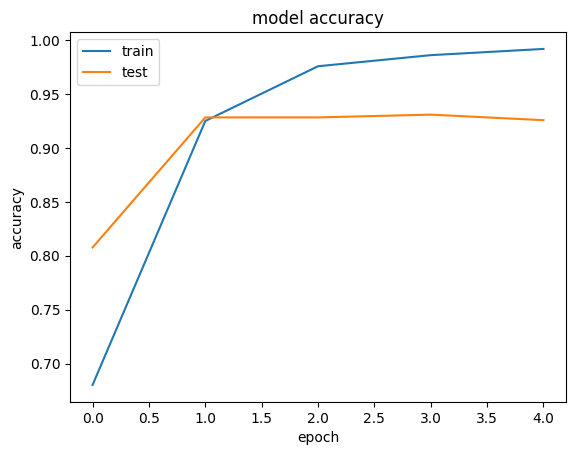

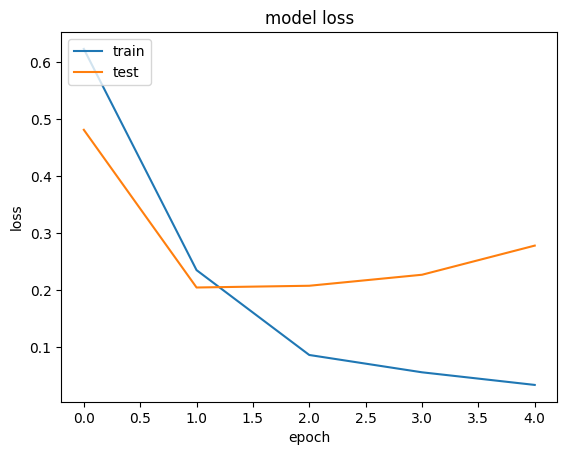

In [ ]:


plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# reviews on which we need to predict


sentence=["it smelt like raw sewerage and was so disappointing ", "passable","the hotel is exceptional","disappointing"," bathroom floor dirty","i love it","the bed wasn't clean and not comfortable","i didn't like the food  "]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model2.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 50ms/step
it smelt like raw sewerage and was so disappointing 
Predicted sentiment :  Negative
passable
Predicted sentiment :  Negative
the hotel is exceptional
Predicted sentiment :  Positive
disappointing
Predicted sentiment :  Negative
 bathroom floor dirty
Predicted sentiment :  Negative
i love it
Predicted sentiment :  Positive
the bed wasn't clean and not comfortable
Predicted sentiment :  Positive
i didn't like the food  
Predicted sentiment :  Negative


In [ ]:

def predict_sentiment(review, model):

  #sentence=["it smelt like raw sewerage and was so disappointing ", "passable","the hotel is exceptional","disappointing"," bathroom floor dirty","i love it","the bed wasn't clean and not comfortable","i didn't like the food  "]
  sentence=[]
  sentence.append(review)
  # convert to a sequence
  sequences = tokenizer.texts_to_sequences(sentence)
  # pad the sequence
  padded = pad_sequences(sequences, padding='post', maxlen=max_length)
  # Get labels based on probability 1 if p>= 0.5 else 0
  prediction = model.predict(padded)
  pred_labels = []
  for i in prediction:
      if i >= 0.5:
          pred_labels.append(1)
      else:
          pred_labels.append(0)
  for i in range(len(sentence)):
      print(sentence[i])
      if pred_labels[i] == 1:
          s = 'Positive'
      else:
          s = 'Negative'
      print("Predicted sentiment : ",s)

  return s



### applying predicted labels to df

In [ ]:

sequences = tokenizer.texts_to_sequences(df2["final_review"])
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model2.predict(padded)

df2["predicted_score"]=prediction
df2['predicted_sentiment']= df2.predicted_score.apply(lambda x: "Positive" if x > 0.5 else "Negative")
df2['Label_Sentiment']=df2.Label_Sentiment.apply(lambda x: "Positive" if x ==1 else "Negative")


825/825 [==============================] - 64s 77ms/step


In [ ]:
confusion_matrix=confusion_matrix(df2['Label_Sentiment'],df2['predicted_sentiment'])
confusion_matrix

array([[ 1203,    15],
       [ 2707, 22461]])

              precision    recall  f1-score   support

    Negative       0.31      0.99      0.47      1218
    Positive       1.00      0.89      0.94     25168

    accuracy                           0.90     26386
   macro avg       0.65      0.94      0.71     26386
weighted avg       0.97      0.90      0.92     26386

Accuracy : 0.896839232926552


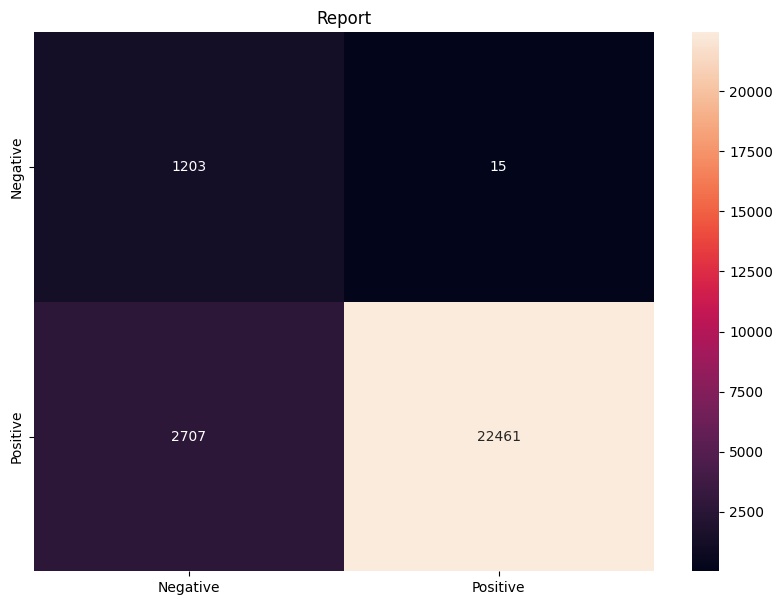

In [ ]:


plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title('Report')

#Classification report with the precision, recall and f1-score
print(classification_report(df2['Label_Sentiment'],df2['predicted_sentiment']))
#Accuracy score
print("Accuracy :", accuracy_score(df2['Label_Sentiment'], df2['predicted_sentiment']))

In [ ]:
df2.head()

,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999794,Positive
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.995007,Positive
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,Positive,0.999318,Positive
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,Positive,0.966287,Positive
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,Positive,0.897018,Positive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/PFA /")

df2.to_csv("hotel_review_sentiment_dataset.csv",index=True)

### sauvegarder le modele

In [ ]:
  # This function saves a model on the drive using two files: a json and a h5
def save_keras_model(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(filename+".h5")

In [ ]:
loadedmodel=save_keras_model(model2, "model_hotel_sentiment_anal")
loadedmodel

### charger le modele  et prediction


In [ ]:
from keras.models import model_from_json
# This function loads a model from two files : a json and a h5
# BE CAREFUL : the model NEEDS TO BE COMPILED before any use !
def load_keras_model(filename):
    # load json and create model
    json_file = open(filename+".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(filename+".h5")
    return loaded_model

In [ ]:

model_loaded=load_keras_model("model_hotel_sentiment_anal")
model_loaded

In [ ]:
predict_sentiment("the food was really bad", model_loaded)

1/1 [==============================] - 0s 47ms/step
the food was really bad
Predicted sentiment :  Negative


'Negative'

#  aspects extraction

### extract aspects

In [ ]:
!pip install spacy

In [ ]:
import spacy


def aspect_extract(sentences):
  sp = spacy.load("en_core_web_sm")
  ext_aspects = []

  global counter


  important = sp(sentences)

  target = ''
  for token in important:
    if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
      target = token.text
      ext_aspects.append(target)
                # if token.pos_ == 'ADJ':
                #     added_terms = ''
                #     for mini_token in token.children:
                #         if mini_token.pos_ != 'ADV':
                #             continue
                #         added_terms += mini_token.text + ' '
                #     descriptive_item = added_terms + token.text


  return ext_aspects



In [ ]:

print(list(set(aspect_extract(df2["final_review"][4]))))



2485
['water', 'apartment', 'building', 'view']


In [ ]:
# extract aspects for each review

# df3_aspects=df2

# aspects = []
# for j in range(0, df2.shape[0]):
#   print(j)

#   list_aspects=aspect_extract(df2.iloc[j]["final_review"])
#   aspects.append(list(set(list_aspects)))


# #print(aspects)

# # df3_aspects['aspects']=aspects
# # df3.head()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
2153

In [ ]:
print(aspects)

[[], [], ['location'], ['house', 'stay'], ['water', 'apartment', 'building', 'view'], ['hostess'], ['location'], [], [], ['stay', 'place'], ['connection'], [], [], ['room', 'decorations'], ['breakfast'], ['family'], ['peacefulness'], [], ['car', 'miles'], [], ['breakfast'], ['location', 'rooms', 'staff'], [], ['owners', 'tea'], [], [], [], [], [], [], ['breakfast'], [], [], ['setup', 'breakfast', 'staff', 'separation', 'weather', 'area'], [], ['breakfast', 'owner'], ['staff'], [], [], ['room', 'staff', 'hotel'], ['location'], ['people'], ['windows', 'hotel'], [], ['wifi'], ['room', 'shower', 'host', 'bit'], ['pool', 'quilt'], [], [], [], ['breakfast', 'vida'], [], [], ['system'], [], ['bed'], ['breakfast', 'necessities'], ['breakfast'], ['fan'], [], ['bar'], [], ['location'], [], ['host'], ['room', 'bedsheets', 'airconditioning'], ['apartment', 'durbuy', 'host', 'location'], ['tip'], ['couch', 'view'], ['taste'], [], [], ['bed'], ['rooms'], ['alles'], ['birds', 'rooms', 'breakfast', 'l

In [ ]:
df3_aspects['aspects']=aspects


In [ ]:
df3_aspects

,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment,aspects
0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999736,Positive,[]
1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.997360,Positive,[]
2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,Positive,0.999482,Positive,[location]
3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,Positive,0.938346,Positive,"[house, stay]"
4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,Positive,0.006450,Negative,"[water, apartment, building, view]"
...,...,...,...,...,...,...,...,...,...,...
26670,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,8.8,Business trip~Solo traveller~Double or Twin Ro...,good stay. had a room with the view to the mai...,Positive,0.996845,Positive,[]
26671,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,10.0,Leisure trip~Family with young children~Tent~S...,"exceptional. there was not to like. , was ex...",Positive,0.997342,Positive,[]
26672,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.9,Leisure trip~Couple~Standard Double or Twin Ro...,good. poor internet connection and aircon in r...,Positive,0.992224,Positive,"[room, mins, connection]"
26673,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,8.3,Leisure trip~Couple~Basic Double Room~Stayed 1...,very good.,Positive,0.982797,Positive,[]


In [ ]:
df3_aspects.to_csv("hotel_aspects.csv",index=True)

### load aspects

In [ ]:
import pandas as pd
df_aspects= pd.read_csv("/content/drive/MyDrive/PFA /hotel_aspects.csv")

df_aspects.shape
df_aspects

,Unnamed: 0,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment,aspects
0,0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999736,Positive,[]
1,1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.997360,Positive,[]
2,2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,Positive,0.999482,Positive,['location']
3,3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,Positive,0.938346,Positive,"['house', 'stay']"
4,4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,Positive,0.006450,Negative,"['water', 'apartment', 'building', 'view']"
...,...,...,...,...,...,...,...,...,...,...,...
26381,26670,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,8.8,Business trip~Solo traveller~Double or Twin Ro...,good stay. had a room with the view to the mai...,Positive,0.996845,Positive,[]
26382,26671,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,10.0,Leisure trip~Family with young children~Tent~S...,"exceptional. there was not to like. , was ex...",Positive,0.997342,Positive,[]
26383,26672,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.9,Leisure trip~Couple~Standard Double or Twin Ro...,good. poor internet connection and aircon in r...,Positive,0.992224,Positive,"['room', 'mins', 'connection']"
26384,26673,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,8.3,Leisure trip~Couple~Basic Double Room~Stayed 1...,very good.,Positive,0.982797,Positive,[]


In [ ]:
import ast

def clean_aspects(tags):
    # Convertir la chaîne de caractères en liste
    tags_list = ast.literal_eval(tags)
    return ','.join(tags_list)



# Appliquer la fonction de nettoyage à la colonne tags
df_aspects['aspects'] = df_aspects['aspects'].astype(str).apply(clean_aspects)
#df_aspects['tags'] = df_aspects['tags'].str.replace('~', ',')
#df_aspects['aspects'] =df_aspects.tags.astype(str)+ ","+df_aspects.aspects.astype(str)
df_aspects


,Unnamed: 0,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment,aspects
0,0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999736,Positive,
1,1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.997360,Positive,
2,2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,Positive,0.999482,Positive,location
3,3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,Positive,0.938346,Positive,"house,stay"
4,4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,Positive,0.006450,Negative,"water,apartment,building,view"
...,...,...,...,...,...,...,...,...,...,...,...
26381,26670,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,8.8,Business trip~Solo traveller~Double or Twin Ro...,good stay. had a room with the view to the mai...,Positive,0.996845,Positive,
26382,26671,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,10.0,Leisure trip~Family with young children~Tent~S...,"exceptional. there was not to like. , was ex...",Positive,0.997342,Positive,
26383,26672,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.9,Leisure trip~Couple~Standard Double or Twin Ro...,good. poor internet connection and aircon in r...,Positive,0.992224,Positive,"room,mins,connection"
26384,26673,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,8.3,Leisure trip~Couple~Basic Double Room~Stayed 1...,very good.,Positive,0.982797,Positive,


In [ ]:
required_columns=['reviewed_by','aspects']
#filter the dataset to include only the required columns
df_aspects=df_aspects[required_columns]

df_aspects.head()




,reviewed_by,aspects
0,Kyrylo,
1,Dimitri,
2,Virginia,location
3,Kannan,"house,stay"
4,Sue,"water,apartment,building,view"


In [ ]:
def concatenate_aspects(aspect_list):
    # Combiner toutes les chaînes de caractères en une seule liste de mots
    all_aspects = ','.join(aspect_list).split(',')
    # Supprimer les espaces et les doublons
    unique_aspects = set([aspect.strip() for aspect in all_aspects])
    return ','.join(unique_aspects)

In [ ]:
# Grouper par utilisateur et appliquer la fonction de concaténation
grouped_df=df_aspects
grouped_df['aspects'] = df_aspects.groupby('reviewed_by')['aspects'].transform(lambda x : ' , '.join(x))
grouped_df = grouped_df.drop_duplicates()

# Vérifier le résultat
grouped_df

<ipython-input-11-a0183b4b89c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['aspects'] = df_aspects.groupby('reviewed_by')['aspects'].transform(lambda x : ' , '.join(x))


,reviewed_by,aspects
0,Kyrylo,
1,Dimitri,", , food,spa , breakfast,hosts,rooms , , ,..."
2,Virginia,"location , bathrooms , personnel,restaurant,ro..."
3,Kannan,"house,stay"
4,Sue,"water,apartment,building,view , reception,beds..."
...,...,...
26369,Aynur,room
26375,Chrizzer,
26378,Olya,place
26379,Subodh,


In [ ]:
grouped_df

,reviewed_by,aspects
0,Kyrylo,
1,Dimitri,", , food,spa , breakfast,hosts,rooms , , ,..."
2,Virginia,"location , bathrooms , personnel,restaurant,ro..."
3,Kannan,"house,stay"
4,Sue,"water,apartment,building,view , reception,beds..."
...,...,...
26369,Aynur,room
26375,Chrizzer,
26378,Olya,place
26379,Subodh,


In [ ]:
def remove_duplicates(row):
    aspects_list = row.split(',')
    unique_aspects = set(aspects_list)
    return ','.join(unique_aspects)

# Appliquer la fonction remove_duplicates à chaque élément de la colonne 'aspects'
grouped_df['aspects'] = grouped_df['aspects'].apply(remove_duplicates)
grouped_df

<ipython-input-13-8628ff17a0e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['aspects'] = grouped_df['aspects'].apply(remove_duplicates)


,reviewed_by,aspects
0,Kyrylo,
1,Dimitri,"rest, ,rooms, property, ,host , breakfast,hos..."
2,Virginia,"room, ,windows,rooms , bathrooms ,shower,roo..."
3,Kannan,"house,stay"
4,Sue,"apartment, reception,water,beds,area , recepti..."
...,...,...
26369,Aynur,room
26375,Chrizzer,
26378,Olya,place
26379,Subodh,


In [ ]:
import os
os.chdir("/content/drive/MyDrive/PFA /")

grouped_df.to_csv("user_only_aspects.csv",index=True)
